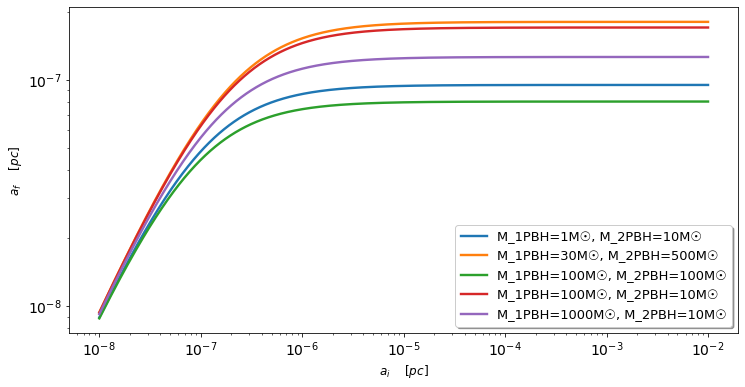

In [6]:
import numpy as np
from scipy.integrate import odeint
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


π=np.pi
G=4.4908e-15            #in units of M☉^-1 pc^3 yr^-2
ρ_eq=3.1811e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
t_eq=5.0506e4           #in units of yr for t_eq = 1.59246e12 seconds


M_1PBH_list=[1,30,100,100,1000]             #in units of M☉  
M_2PBH_list=[10,50,100,10,10]              #in units of M☉


x=0.063     # in units of pc              # let say


λ_list=np.zeros(len(M_1PBH_list))

def λ_0(M_1PBH,M_2PBH):
     return ((8*π*ρ_eq*(x**3))/(3*(M_1PBH+M_2PBH)))

for k, (M_1PBH,M_2PBH) in enumerate (zip(M_1PBH_list,M_2PBH_list)):
     λ_list[k]=λ_0(M_1PBH,M_2PBH) 

        
        
def h(x):
    return math.sqrt((x**-3)+(x**-4))   
def g(x):
    return  -((3*x+4)/(2*h(x)*(x**5))) #g(x)=h'(x).
    
    
def s_dec(λ_0):
    def f(u,s,λ_0):
            return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]    #eq.(1) in reference pdf "M_DM at s_dec".
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,((6*λ_0)/3),100000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        Δ=(Bs[i] - Bs[i-1])
        s=(As[i]*λ_0)              #s/λ at which the binary decouples.
        A=Bs[i] 
        if Δ<0:
            break
    return s


def semi(λ_0):
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]    
    separation0= [1e-12,1]
    b=(3*λ_0)/100000
    ss= np.linspace(1e-12,(2*λ_0),1000000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        Δ=(Bs[i] - Bs[i-1])
        A=Bs[i]
        a=((A/2)*λ_0)                   #as Bs=separations/λ_0.
        if Δ<0:
            break
    
    return a

s_dec_list=np.zeros(len(λ_list))
a_list=np.zeros(len(λ_list))

for j, λ_0 in enumerate (λ_list):
    s_dec_list[j]=s_dec(λ_0)
    a_list[j]=semi(λ_0)
    

e_list=[0.999,0.9,0.99,0.89,0.69]        
        
def r_min(e_i,a_i):
    return (a_i*(1-e_i)) 

def t_dec(s_dec):
    return (((3/(8*π*G*ρ_eq))**(1/4))*(((2/3)*(s_dec-2)*((s_dec+1)**(1/2))+(4/3))**(1/2)))

def r_ta(M_PBH,s_dec): 
    return ((4*G*M_PBH*t_dec(s_dec))**(1/3))

def M_DM(M_PBH):
    return ((8/3)*π*ρ_eq*(t_eq**(3/2)))*((2*G*M_PBH)**(3/4))*(r_ta(M_PBH,s_dec)**(3/4))
            
def M_1(M_1PBH):
    return (M_1PBH+M_DM(M_1PBH))
            
def M_2(M_2PBH):
    return (M_2PBH+M_DM(M_2PBH)) 

def M_bar(M_PBH):
    return ((8*π)/3)*ρ_eq*(t_eq**(3/2))*((2*G*M_PBH)**(3/4))

def E_1(M_PBH):
    return ((4*π*ρ_eq*((2*G*M_PBH)**(7/4))*(t_eq**(3/2))*M_PBH))*(r_min**(-1/4))

def E_2(M_PBH):
    return  ((2*π*ρ_eq*M_bar(M_PBH)*(t_eq**(3/2)))*((2*G*M_PBH)**(7/4))*((r_ta(M_PBH,s_dec)**(1/2))+(r_min**(1/2))))

def E_b(M_PBH):
    return (E_1(M_PBH)- E_2(M_PBH))
            
def a_f(a_i,M_1PBH,M_2PBH):
    return ((G*M_1PBH*M_2PBH*a_i)/((G*M_1(M_1PBH)*M_2(M_2PBH))+(2*a_i*(E_b(M_1PBH)+E_b(M_2PBH)))))


r_min_list=np.zeros(len(a_list))
for k, (e_i,a_i) in enumerate (zip(e_list,a_list)):
     r_min_list[k]=r_min(e_i,a_i)



a_i=np.linspace(1e-8,1e-2,10000000)  #in units of pc
fig, ax = plt.subplots( sharex=True, figsize=(12,6))
for i, (r_min,s_dec) in enumerate (zip(r_min_list,s_dec_list)):
    ax.loglog(a_i,a_f(a_i,M_1PBH,M_2PBH))

    
plt.rc('lines', linewidth=2.4)    
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(["M_1PBH=1M☉, M_2PBH=10M☉","M_1PBH=30M☉, M_2PBH=500M☉","M_1PBH=100M☉, M_2PBH=100M☉",
            "M_1PBH=100M☉, M_2PBH=10M☉","M_1PBH=1000M☉, M_2PBH=10M☉"],prop = {'size' :13},
           loc='lower right',shadow = True, facecolor = 'white',fontsize=19)
plt.xlabel('$a_{i}\hspace{1.3}[pc]$',fontsize=12)
plt.ylabel('$a_{f}\hspace{1.3}[pc]$',fontsize=12)
plt.title('')
plt.show()                 